In [1]:
import warnings
warnings.filterwarnings('ignore')

# Notebook to look at variations in the DDF experiments
from lsst.sims.maf.runComparison import RunComparison
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import glob



In [2]:
# Database files for runs avaialble at:  https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs1.4/
run_dirs = glob.glob('sci*')
run_names = [direc.replace('sci_','').replace('_v1.4_10yrs', '') for direc in run_dirs]

In [3]:
run_names

['euclidddf',
 'baseline',
 'agnddf',
 'flexddf',
 'flexddf_moreu',
 'longseasonddf',
 'darkddf',
 'descddf']

In [4]:
# ugh, RunComparison is a little bit-rotted, just load it up one at a time and merge
dfs = []
for i in range(len(run_dirs)):
    ack = RunComparison('.', [run_names[i]], rundirs=[run_dirs[i]])
    ack.addSummaryStats()
    dfs.append(ack.summaryStats)
df = pd.concat(dfs)

In [5]:
df

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Rms Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,...,"DD:ELAISS1, i UserPointsSlicer","DD:XMM-LSS, i UserPointsSlicer","DD:ECDFS, i UserPointsSlicer","DD:COSMOS, i UserPointsSlicer","DD:290, i UserPointsSlicer","DD:ELAISS1, z UserPointsSlicer","DD:XMM-LSS, z UserPointsSlicer","DD:ECDFS, z UserPointsSlicer","DD:COSMOS, z UserPointsSlicer","DD:290, z UserPointsSlicer"
euclidddf,18063.277832,1.003515,900.0,831.0,1.090909,1.007273,4.862631,16.429611,2.374553,32605.0,...,28.327876,28.245807,28.300468,28.190439,25.762749,27.917602,27.819908,27.886374,27.767004,25.107138
baseline,18089.295935,1.004961,900.0,833.0,1.090909,1.009697,4.948320,18.555554,2.376975,32608.0,...,28.405577,28.312327,28.342924,28.241853,28.208544,27.986568,27.899283,27.905460,27.833963,27.785673
agnddf,18170.707419,1.009484,943.0,876.0,1.143030,1.061818,4.671884,15.318050,2.297958,32609.0,...,27.687204,27.581989,27.726635,27.493581,27.478616,27.371819,27.271234,27.417425,27.187875,27.188549
flexddf,18166.510951,1.009251,946.0,876.0,1.146667,1.061818,4.688597,13.922934,2.317656,32603.0,...,28.175215,28.078793,28.135661,28.052764,25.876782,27.553910,27.450117,27.507121,27.431323,25.108191
flexddf_moreu,18173.225300,1.009624,944.0,875.0,1.144242,1.060606,4.767962,22.397363,2.299458,32600.0,...,28.221812,28.111068,28.178846,28.060213,25.824558,27.219829,27.129876,27.156138,27.125492,25.088254
darkddf,18159.796601,1.008878,938.0,870.0,1.136970,1.054545,4.724982,14.802864,2.324917,32614.0,...,28.150126,28.088959,28.128960,28.032568,25.775372,27.661186,27.588141,27.630068,27.546944,25.110440
descddf,18163.993070,1.009111,934.0,867.0,1.132121,1.050909,4.692300,12.786913,2.315746,32614.0,...,27.928311,27.877164,28.116504,28.055450,27.611622,27.864112,27.828470,28.047118,28.003257,27.539489


In [34]:
def comp_runs(df, colnames, units='', ylabel=None, labels=None):
    f, ax = plt.subplots()
    if ylabel is None:
        ylabel = colnames[0]
    x = np.arange(df.shape[0])
    ticks = df.index.values.tolist()
    for i,colname in enumerate(colnames):
        if labels is not None:
            label = labels[i]
        else:
            label=None
        ax.plot(x, df[colname], 'o-', label=label)
    ax.set_ylabel(ylabel+' ('+units+')')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks, rotation=90)
    if labels is not None:
        ax.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    return f, ax

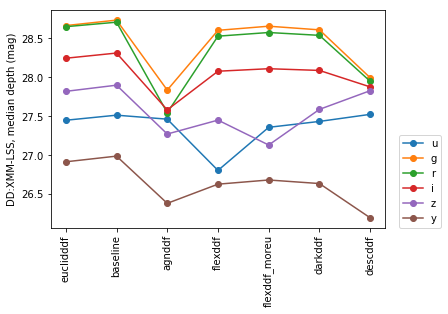

In [35]:
colnames = ['DD:XMM-LSS, %s  UserPointsSlicer' % filtername for filtername in 'ugrizy']

#ylabel = ack.headerStats[column]
f, a = comp_runs(df, colnames, labels='ugrizy', ylabel='DD:XMM-LSS, median depth', units='mag')

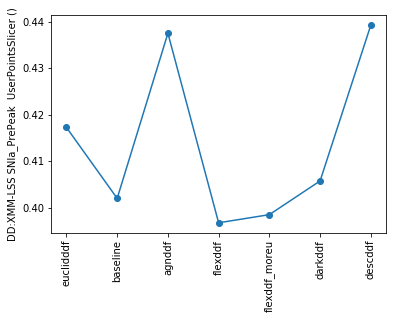

In [36]:

column = 'DD:XMM-LSS SNIa_PrePeak  UserPointsSlicer'
ylabel = ack.headerStats[column]
f, a = comp_runs(df, [column], labels=None)

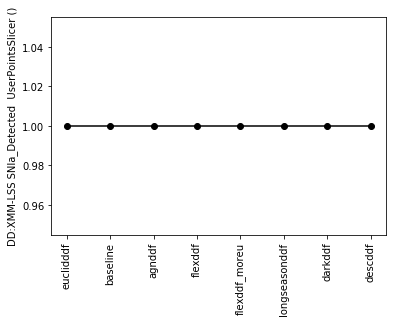

In [25]:
column = 'DD:XMM-LSS SNIa_Detected  UserPointsSlicer'
ylabel = ack.headerStats[column]
f, a = comp_runs(df, column)

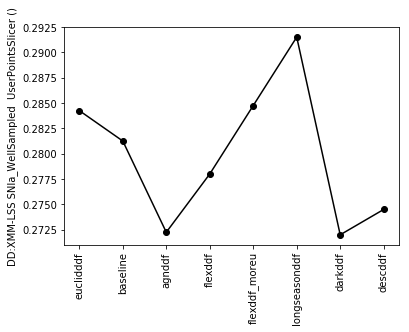

In [26]:
column = 'DD:XMM-LSS SNIa_WellSampled  UserPointsSlicer'
f, a = comp_runs(df, column)

In [19]:
dd_cols = [col for col in df.columns if 'DD:XMM-LSS' in col]
dd_cols

['DD:XMM-LSS SNIa_Detected  UserPointsSlicer',
 'DD:XMM-LSS SNIa_Nobs  UserPointsSlicer',
 'DD:XMM-LSS SNIa_PrePeak  UserPointsSlicer',
 'DD:XMM-LSS SNIa_WellSampled  UserPointsSlicer',
 'DD:XMM-LSS, u  UserPointsSlicer',
 'DD:XMM-LSS, r  UserPointsSlicer',
 'DD:XMM-LSS, y  UserPointsSlicer',
 'DD:XMM-LSS, g  UserPointsSlicer',
 'DD:XMM-LSS, i  UserPointsSlicer',
 'DD:XMM-LSS, z  UserPointsSlicer']

In [9]:
ack.headerStats

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Max Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error @ 22.4 All visits HealpixSlicer,Min Parallax Error @ 22.4 All visits HealpixSlicer,...,"DD:ELAISS1, i UserPointsSlicer","DD:XMM-LSS, i UserPointsSlicer","DD:ECDFS, i UserPointsSlicer","DD:COSMOS, i UserPointsSlicer","DD:290, i UserPointsSlicer","DD:ELAISS1, z UserPointsSlicer","DD:XMM-LSS, z UserPointsSlicer","DD:ECDFS, z UserPointsSlicer","DD:COSMOS, z UserPointsSlicer","DD:290, z UserPointsSlicer"
BaseName,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,fO All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,Parallax Error @ 22.4 All visits HealpixSlicer,...,"DD:ELAISS1, i UserPointsSlicer","DD:XMM-LSS, i UserPointsSlicer","DD:ECDFS, i UserPointsSlicer","DD:COSMOS, i UserPointsSlicer","DD:290, i UserPointsSlicer","DD:ELAISS1, z UserPointsSlicer","DD:XMM-LSS, z UserPointsSlicer","DD:ECDFS, z UserPointsSlicer","DD:COSMOS, z UserPointsSlicer","DD:290, z UserPointsSlicer"
MetricName,fO,fO,fO,fO,fO,fO,Parallax Error @ 22.4,Parallax Error @ 22.4,Parallax Error @ 22.4,Parallax Error @ 22.4,...,"DD:ELAISS1, i","DD:XMM-LSS, i","DD:ECDFS, i","DD:COSMOS, i","DD:290, i","DD:ELAISS1, z","DD:XMM-LSS, z","DD:ECDFS, z","DD:COSMOS, z","DD:290, z"
MetricMetadata,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,All visits,...,,,,,,,,,,
SlicerName,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,HealpixSlicer,...,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer,UserPointsSlicer
SummaryName,fOArea,fOArea/benchmark,fONv MedianNvis,fONv MinNvis,fONv/benchmark MedianNvis,fONv/benchmark MinNvis,Max,Mean,Median,Min,...,"median depth DD:ELAISS1, i","median depth DD:XMM-LSS, i","median depth DD:ECDFS, i","median depth DD:COSMOS, i","median depth DD:290, i","median depth DD:ELAISS1, z","median depth DD:XMM-LSS, z","median depth DD:ECDFS, z","median depth DD:COSMOS, z","median depth DD:290, z"


In [11]:
ack.headerStats[df.columns[-2]]['SummaryName']

'median depth DD:COSMOS, z'

In [27]:
# Now to do the stuff computed in glance
dfs = []
for i in range(len(run_dirs)):
    ack = RunComparison('.', [run_names[i]], rundirs=[run_names[i]+'_v1.4_10yrs'])
    ack.addSummaryStats()
    dfs.append(ack.summaryStats)
df = pd.concat(dfs)

In [35]:
dd = [col for col in df.columns if 'Coadd' in col]

In [36]:
dd

['10th%ile CoaddM5  HealpixSlicer',
 '10th%ile CoaddM5  g HealpixSlicer',
 '10th%ile CoaddM5  i HealpixSlicer',
 '10th%ile CoaddM5  r HealpixSlicer',
 '10th%ile CoaddM5  u HealpixSlicer',
 '10th%ile CoaddM5  y HealpixSlicer',
 '10th%ile CoaddM5  z HealpixSlicer',
 'CoaddM5  HealpixSlicer',
 'CoaddM5  g HealpixSlicer',
 'CoaddM5  i HealpixSlicer',
 'CoaddM5  r HealpixSlicer',
 'CoaddM5  u HealpixSlicer',
 'CoaddM5  y HealpixSlicer',
 'CoaddM5  z HealpixSlicer',
 'Max CoaddM5  HealpixSlicer',
 'Max CoaddM5  g HealpixSlicer',
 'Max CoaddM5  i HealpixSlicer',
 'Max CoaddM5  r HealpixSlicer',
 'Max CoaddM5  u HealpixSlicer',
 'Max CoaddM5  y HealpixSlicer',
 'Max CoaddM5  z HealpixSlicer',
 'Mean CoaddM5  HealpixSlicer',
 'Mean CoaddM5  g HealpixSlicer',
 'Mean CoaddM5  i HealpixSlicer',
 'Mean CoaddM5  r HealpixSlicer',
 'Mean CoaddM5  u HealpixSlicer',
 'Mean CoaddM5  y HealpixSlicer',
 'Mean CoaddM5  z HealpixSlicer',
 'Median CoaddM5  HealpixSlicer',
 'Median CoaddM5  g HealpixSlicer',


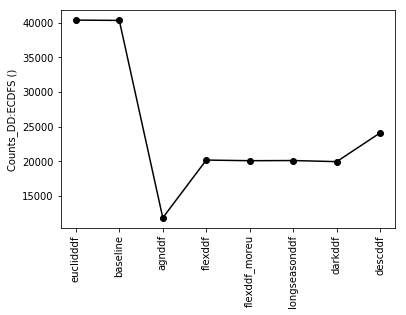

In [31]:
column = 'Counts_DD:ECDFS'
f, a = comp_runs(df, column)

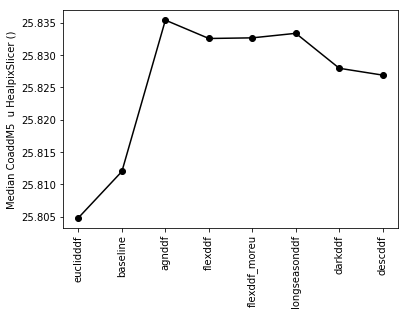

In [37]:
column = 'Median CoaddM5  u HealpixSlicer'
f, a = comp_runs(df, column)